# Coding practice \#4: Due midnight, November 19

files needed = ('airline_products_2017.csv')

Answer the questions below in a jupyter notebook. You can simply add cells to this notebook and enter your answers. When you are finished, upload the completed notebook to canvas. 

A reminder: My office hours are Tuesdays 10:45AM-11:45AM and Wednesdays 5:00PM-5:30PM in Soc Sci 7444. I am also available by email and zoom.

*You should feel free to discuss the coding practice with your classmates, but the work you turn in should be your own.*

# Exercise 0: Yuan, Meng
Replace 'Last, First' above with your actual name. Enter it as: last name, first name.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns

# Exercise 1: groupby and more bar charts

The file 'airline_products_2017.csv' contains some data used in the first chapter of Dennis's dissertation. The data are taken from the Airline Origin & Destination Survey (DB1B) but has been substantially cleaned. Thanks Dennis! \[Dennis was the TA for this class in 2018. He is now working at Bates White Consulting. The course TAs have contributed a lot to the class.\] 

In particular, the data contain information on a sample of airline itineraries for flights departing from one of seven airports in the San Francisco Bay region and arriving at one of the other large cities in the United States in the second quarter of 2017. Each observation contains information on the origin airport, destination airport, airline,  nonstop or connecting itinerary type, average one-way fare in dollars, and distance between the origin and destination (in miles).

In this exercise, we will make a simple scatterplot and then repeatedly use the `.groupby()` method to create several bar charts. Follow the instructions below.

### Part (a):

1. Load the data as a Pandas data frame and keep only the nonstop flights. 
2. Make a scatterplot of distance (x axis) against prices (y axis). 
3. Make the scatterpoints blue circles that are not filled in. 

You'll notice a strange gap in the distance data between 1,000 and 1,500 miles&mdash;it's called "flyover country" for a reason!

In [2]:
# part(a)
#1

airline_data = pd.read_csv("airline_products_2017.csv")

airline_data.head(3)

,Unnamed: 0,origin_airport,dest_airport,airline,fare,nonstop,distance,origin_city,dest_city,passengers
0,51,SFO,ALB,Southwest Airlines,267.50681,0,2558.998270,"San Francisco, CA","Albany, NY",250
1,52,SFO,ALB,United Airlines,346.01853,0,2558.998270,"San Francisco, CA","Albany, NY",270
2,53,SJC,ALB,Southwest Airlines,275.93250,0,2543.615783,"San Jose, CA","Albany, NY",320


In [3]:
nonstop = airline_data[airline_data['nonstop']==1]
nonstop.head(3)

,Unnamed: 0,origin_airport,dest_airport,airline,fare,nonstop,distance,origin_city,dest_city,passengers
6,119,SJC,ABQ,Southwest Airlines,183.86714,1,869.976792,"San Jose, CA","Albuquerque, NM",490
8,121,SMF,ABQ,Southwest Airlines,213.29703,1,866.380980,"Sacramento, CA","Albuquerque, NM",370
9,122,SFO,ABQ,United Airlines,244.94445,1,896.334413,"San Francisco, CA","Albuquerque, NM",360


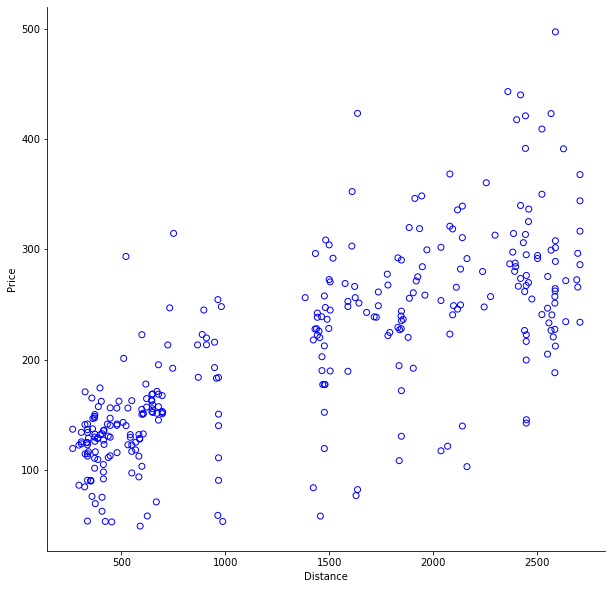

In [4]:
#2+3
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(nonstop['distance'], nonstop['fare'],facecolors='none', edgecolors='blue')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Distance')
ax.set_ylabel('Price')

plt.show()

### Part (b):

1. Use the `.groupby()` method to obtain the **median** fare for nonstop flights for each airline. Print the median fares to the screen.

In [5]:
#part(b)
#1
nonstop_medians_1 = nonstop[['airline','fare']].groupby('airline').median()

In [6]:
nonstop_medians_1

,fare
airline,
Alaska Airlines,140.300230
Allegiant Air,63.637638
American Airlines,221.730330
Delta Air Lines,167.254630
Frontier Airlines,109.993130
JetBlue Airways,240.673565
Skywest Airlines,101.370130
Southwest Airlines,222.615730
Spirit Air Lines,92.401984


2. Make a bar chart displaying the median fare for American Airlines, Delta Air Lines, Southwest Airlines, and United Airlines. Give the chart appropriate labels etc. and make it look nice. \[We covered bar charts in the week #9 Friday notebook.\]

Contrary to intuition, Delta appears to have much lower fares than Southwest!

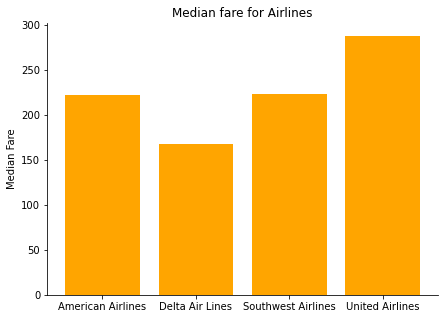

In [7]:
#2 
bar_b2 = nonstop_medians_1.loc[['American Airlines','Delta Air Lines', 'Southwest Airlines', 'United Airlines']]

fig, ax = plt.subplots(figsize=(7,5))

ax.bar(bar_b2.index, bar_b2['fare'], color='orange', alpha=1.0)     

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Median Fare')
ax.set_title('Median fare for Airlines')

plt.show()

### Part (c):

The bar chart above might be misleading, because different airlines may fly to different cities that are different distances from San Francisco, so we might be confusing variation in fares across airlines with variation in fares for flights of different distances. Let's try to fix this:

   1. On the original data frame of non-stop flights, use the `.cut()` method to create distance bins 500 miles in width (starting at 0 and ending at 3000). 
   
   2. Use the `.groupby()` method to obtain the median airfare by distance bin by airline. 

In [8]:
# part(c)
#1
nonstop2 = nonstop

In [18]:
bins = list(range(0,3001,500))
nonstop2['distance_bin'] = pd.cut(nonstop2['distance'], bins, right = False)

<ipython-input-18-8b7aeca027a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonstop2['distance_bin'] = pd.cut(nonstop2['distance'], bins, right = False)


In [10]:
#2
n2 = nonstop2[['fare','airline','distance_bin']].groupby(['airline','distance_bin']).mean()
n2

fare
airline         distance_bin            
Alaska Airlines [0, 500)      121.368922
                [500, 1000)   134.040610
                [1000, 1500)  119.268510
                [1500, 2000)  180.700170
                [2000, 2500)  262.213583
...                                  ...
Virgin America  [500, 1000)   143.662103
                [1000, 1500)  177.392670
                [1500, 2000)  240.048885
                [2000, 2500)  332.866327
                [2500, 3000)  288.994597

[72 rows x 1 columns]

3. Then reset the index on the resulting series. Your data should be *long* at this point.


In [11]:
#3
n3 = n2.reset_index()

n3.head(3)


,airline,distance_bin,fare
0,Alaska Airlines,"[0, 500)",121.368922
1,Alaska Airlines,"[500, 1000)",134.040610
2,Alaska Airlines,"[1000, 1500)",119.268510


   4. Keep the observations for the 4 airlines discussed above: American Airlines, Delta Air Lines, Southwest Airlines, and United Airlines.
   5. Covert the distance bin column to a string instead of an Interval object type. \[try `astype( )`\]
  

In [12]:
#4
n4 = n3[n3.airline.isin(['American Airlines','Delta Air Lines', 'Southwest Airlines', 'United Airlines'])]

n4.head(3)

,airline,distance_bin,fare
12,American Airlines,"[0, 500)",134.206633
13,American Airlines,"[500, 1000)",156.269220
14,American Airlines,"[1000, 1500)",216.934467


In [13]:
#5
n5 = n4

n5['distance_bin'] = n5['distance_bin'].astype(str)

n5.head(3)

<ipython-input-13-3a5047479b4e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n5['distance_bin'] = n5['distance_bin'].astype(str)


,airline,distance_bin,fare
12,American Airlines,"[0, 500)",134.206633
13,American Airlines,"[500, 1000)",156.269220
14,American Airlines,"[1000, 1500)",216.934467


 6. Now let's create two **horizontal** bar charts using the subplot method. The first shows the median fare by airline for trips between 0 and 500 miles. The second does so for trips between 2,000 and 2,500 miles. 
 
The horizontal axis should show the median fare, the vertical axis should have the airline names as labels. Make the other aspects of the figure look nice. My figure looks like [this](http://badgerdata.org/images/fares.png). 

The resulting chart should show that Delta has the lowest fares for the flights between 0 and 500 miles but the highest fares for flights between 2,000 and 2,500 miles.

In [14]:
#6
range_1 = ['[0, 500)']
n61 = n5[n5['distance_bin'].isin(range_1)]
range_2 = ['[2000, 2500)']
n62 = n5[n5['distance_bin'].isin(range_2)]


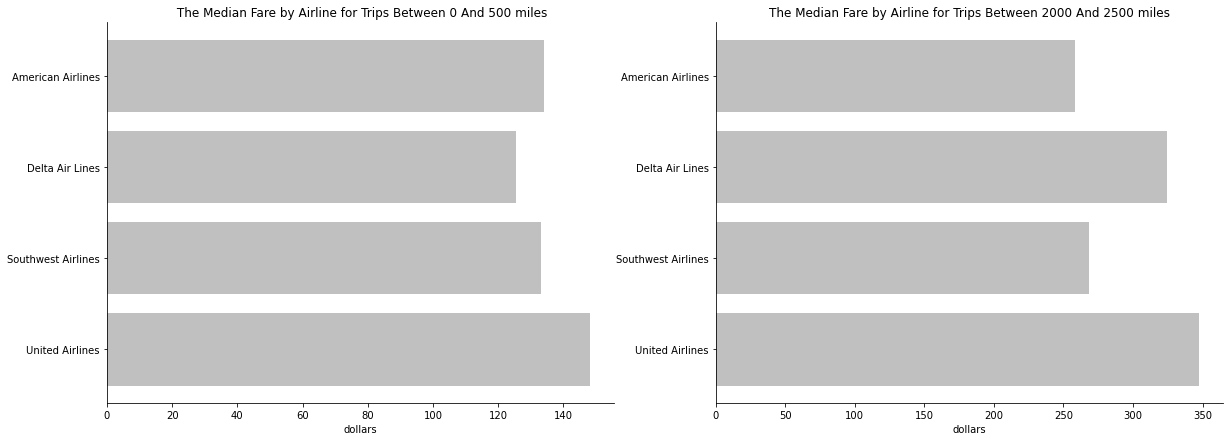

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(20,7))
# median fare by airline for trips between 0 and 500 miles.
ax[0].barh(n61['airline'], n61['fare'],  linewidth = 2.0,  color = 'SILVER')
ax[0].invert_yaxis()
ax[0].set_title(' The Median Fare by Airline for Trips Between 0 And 500 miles')
ax[0].set_xlabel('dollars')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# between 2,000 and 2,500 miles
ax[1].barh(n62['airline'], n62['fare'],  linewidth = 2.0,  color = 'silver')
ax[1].invert_yaxis()
ax[1].set_title('The Median Fare by Airline for Trips Between 2000 And 2500 miles')
ax[1].set_xlabel('dollars')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

plt.show()

7. (Challenging) Create a single *grouped (horizontal) bar chart* with price in dollars on the x axis and the names of the airlines on the y axis. Plot six bars for each airline, grouped by airline. My figure looks like [this](http://badgerdata.org/images/fares_stacked.png)). I am not happy with my colors&mdash;I need to work on it some more.

I used seaborn to do this but you are welcome to use whatever method you prefer. 

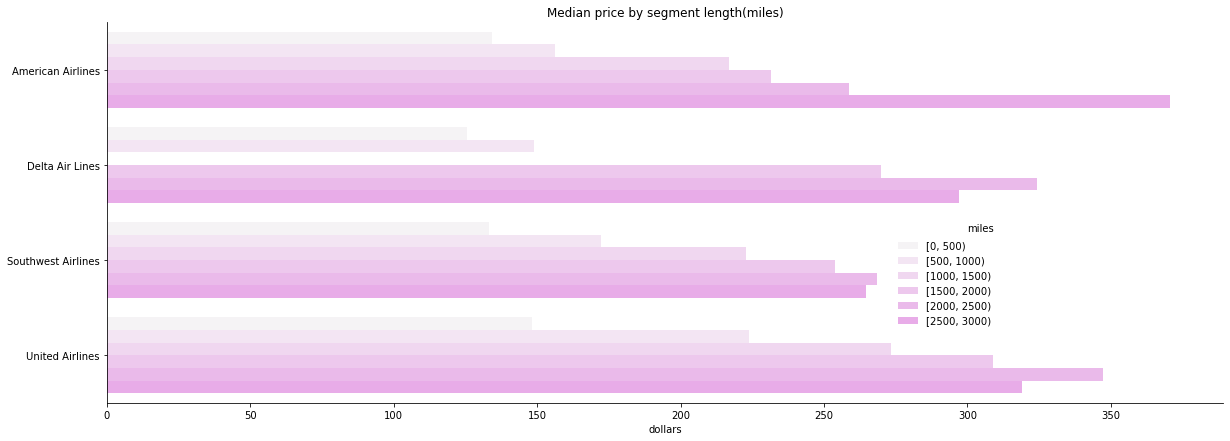

In [16]:
#7

fig, ax = plt.subplots(figsize=(20,7))

ax = sns.barplot(x = 'fare', y = 'airline', hue = 'distance_bin', data = n5 , color = 'violet', alpha = 0.75)
sns.despine(ax = ax)
ax.set_xlabel('dollars')
ax.set_ylabel('')
ax.set_title('Median price by segment length(miles)')
ax.legend(frameon=False, bbox_to_anchor=(0.8, 0.45))
ax.text(300,1.7, 'miles')

plt.show()